**Mathematical Foundations for Computer Vision and Machine Learning**

***Assignment06 - Straight-line fit (least square approximate solution)***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment06)

# Setting up

To calculate least square approximation, we need data.

Variable ```num``` means the number of data
Variable ```y1``` is noisy data and ```y2``` is clean data.

**Noisy** data is displayed as **blue dots** and **clean** data is displayed as **black dots**.


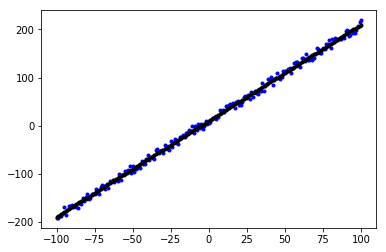

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num     = 201
std     = 20
a       = 2
b       = 10

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-100,100,num)
y1      = a * x + nn * std + b
y2      = a * x + b


# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data
# y = f(x) = a * x + b

plt.plot(x,y1,'b.')
plt.plot(x,y2,'k.')
plt.show()

# To Calculate Least Square

We use matrix multiplication to calculate least square. 

$$ ax_{1} + b = y_{1} $$
$$ ax_{2} + b = y_{2} $$
$$ ax_{3} + b = y_{3} $$
$$ \vdots $$
$$ ax_{n} + b = y_{n} $$

We can write this as matmul.
$$ \begin{pmatrix} x_{1} & 1 \\ \vdots & \vdots \\ x_{n} & 1 \end{pmatrix} 
\begin{pmatrix} a \\ b \end{pmatrix} 
= \begin{pmatrix} y_{1} \\ \vdots \\ y_{n}  \end{pmatrix}$$

We can rewrite this as 
$$ A\theta = B $$



In [3]:
A = np.matrix(np.transpose([x,np.ones(num)]))
B = np.matrix(y1)


# Pseudo Inverse

We can derive x from equation above by pseudo inverse.
$$ \theta = \left( A^{T}A\right)^{-1}A^{T}B $$

In [4]:
theta = (A.T * A).I*A.T*B.T
theta = np.asarray(theta)

# Approximation

$$ \hat{f}(x) = \theta_{1}x + \theta_{2} $$

The red one is the line that fits the noisy data(blue) by the least square error.

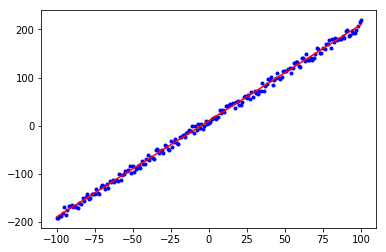

In [5]:
apporx  = theta[0][0] * x + theta[1][0]
plt.plot(x,y1,'b.')
plt.plot(x, apporx, 'r')

plt.show()

# Compare with answer

We can see that the answer(y2, blue) and approximation is quite same.

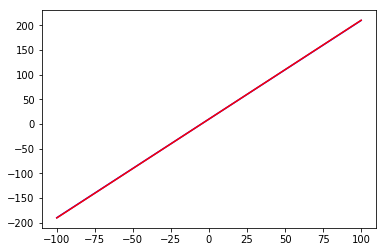

In [6]:
plt.plot(x,y2,'b')
plt.plot(x, apporx, 'r')
plt.show()